In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import os

base_dir = os.getcwd()
data_dir = os.path.join(base_dir, "Construction-Site-Measurements")

colors = ['#1F77B4', '#BA0A24', '#000000', '#22B14C', '#FFC90E', '#FF7F27', '#FF80A9', '#A349A4', '#B97A57']

for i in range(1, 21 + 1):
    filename1 = os.path.join(data_dir, f"cs-m{i}.txt")
    filename2 = os.path.join(data_dir, f"cs-ping-m{i}.txt")
    filename3 = os.path.join(data_dir, f"cs-ping-m{i}-192.txt")

    with open(filename1, 'rb') as file:
        data_tm = file.read().decode('latin-1')
        exec(f"data_tm{i} = {data_tm!r}")

    with open(filename2, 'rb') as file:
        data_pm = file.read().decode('latin-1')
        exec(f"data_pm{i} = {data_pm!r}")
        
    with open(filename3, 'rb') as file:
        data_pm_192 = file.read().decode('latin-1')
        exec(f"data_pm{i}_192 = {data_pm_192!r}")


In [2]:
data1 = []

for i in range(1, 21 + 1):
    data_tm_aux = locals()[f"data_tm{i}"]
    
    for line in data_tm_aux.split('\n'):
        if 'MBytes' in line:
            line_data = line.strip().split()
            transfer = float(line_data[4])
            bitrate = float(line_data[6])
            data1.append((i, transfer, bitrate))

df1 = pd.DataFrame(data1, columns=["Measurement", "Transfer", "Bitrate"])
#print(df1)

data2 = []

for i in range(1, 21 + 1):
    data_pm_aux = locals()[f"data_pm{i}"]
    for line in data_pm_aux.split('\n'):
        if "Zeit=" in line:
            value = line.split("Zeit=")[1].split("ms")[0].strip()
            data2.append((i, int(value)))

df2 = pd.DataFrame(data2, columns=["Measurement", "Value"])
#print(df2)

data3 = []

for i in range(1, 21 + 1):
    data_pm_192_aux = locals()[f"data_pm{i}_192"]
    for line in data_pm_192_aux.split('\n'):
        if "Zeit=" in line:
            value = line.split("Zeit=")[1].split("ms")[0].strip()
            data3.append((i, int(value)))

df3 = pd.DataFrame(data3, columns=["Measurement", "Value"])
#print(df3)

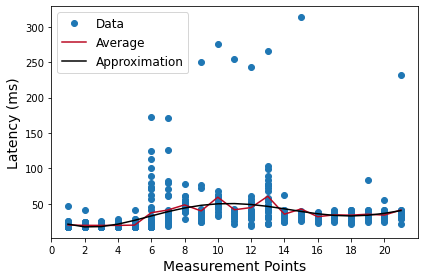

In [41]:
df2_mean = df2.groupby('Measurement').mean()
df2_point = df2_mean.index
df2_pm = df2_mean['Value']

# Perform polynomial approximation for all measurements
degree = 6  
x_values = np.arange(1, 22) 
coeffs = np.polyfit(df2['Measurement'], df2['Value'], degree)
approximation = np.polyval(coeffs, x_values)

# Plot the approximation
fig, ax = plt.subplots()
ax.plot(df2['Measurement'], df2['Value'], 'o', label='Data', color=colors[0])

ax.plot(df2_point, df2_pm, '-', label='Average', color=colors[1])

ax.plot(x_values, approximation, '-', label='Approximation', color=colors[2])
ax.set_xticks(range(0, 22, 2))

ax.set_xlabel('Measurement Points', fontsize=14)  
ax.set_ylabel('Latency (ms)', fontsize=14)  
ax.legend(fontsize=12) 

fig.tight_layout()
fig.savefig(r'Graphics/Construction-Site/cs-ping-172.pdf', format='pdf')

plt.show()


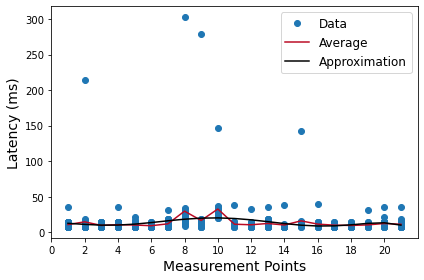

In [40]:
df3_mean = df3.groupby('Measurement').mean()
df3_point = df3_mean.index
df3_pm = df3_mean['Value']

# Perform polynomial approximation for all measurements
degree = 6  # Choose the degree of the polynomial (e.g., linear: degree=1)
x_values = np.arange(1, 22)  # Define x-axis values as [0, 1, 2, ..., 21]
coeffs = np.polyfit(df3['Measurement'], df3['Value'], degree)
approximation = np.polyval(coeffs, x_values)

# Plot the approximation
fig, ax = plt.subplots()
ax.plot(df3['Measurement'], df3['Value'], 'o', label='Data', color=colors[0])

ax.plot(df3_point, df3_pm, '-', label='Average', color=colors[1])

ax.plot(x_values, approximation, '-', label='Approximation', color=colors[2])
ax.set_xticks(range(0, 22, 2))

# Set labels and show the plot
ax.set_xlabel('Measurement Points', fontsize=14)  
ax.set_ylabel('Latency (ms)', fontsize=14)  
ax.legend(fontsize=12) 

fig.tight_layout()
fig.savefig(r'Graphics/Construction-Site/cs-ping-192.pdf', format='pdf')

plt.show()

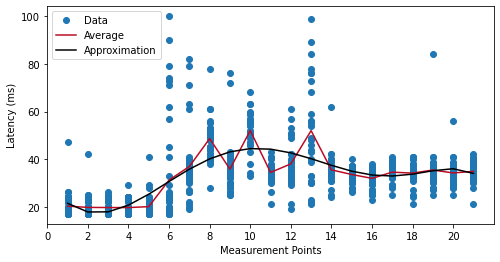

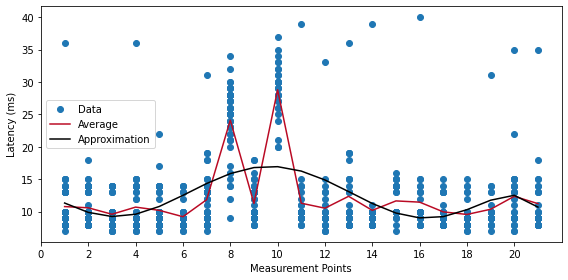

In [5]:
filtered_df2 = df2[df2['Value'] <= 100]
df2_mean_filtered = filtered_df2.groupby('Measurement').mean()
df2_point_filtered = df2_mean_filtered.index
df2_pm_filtered = df2_mean_filtered['Value']

filtered_df3 = df3[df3['Value'] <= 100]
df3_mean_filtered = filtered_df3.groupby('Measurement').mean()
df3_point_filtered = df3_mean_filtered.index
df3_pm_filtered = df3_mean_filtered['Value']

# Perform polynomial approximation for all measurements
degree = 6  # Choose the degree of the polynomial (e.g., linear: degree=1)
x_values = np.arange(1, 22)  # Define x-axis values as [0, 1, 2, ..., 21]
coeffs = np.polyfit(filtered_df2['Measurement'], filtered_df2['Value'], degree)
approximation = np.polyval(coeffs, x_values)

# Plot the approximation
fig1, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(filtered_df2['Measurement'], filtered_df2['Value'], 'o', label='Data', color=colors[0])

ax1.plot(df2_point_filtered, df2_pm_filtered, '-', label='Average', color=colors[1])

ax1.plot(x_values, approximation, '-', label='Approximation', color=colors[2])
ax1.set_xticks(range(0, 22, 2))

# Set labels and show the plot
ax1.set_xlabel('Measurement Points')
ax1.set_ylabel('Latency (ms)')
ax1.legend()
plt.show()


# Perform polynomial approximation for all measurements
degree = 6  # Choose the degree of the polynomial (e.g., linear: degree=1)
x_values = np.arange(1, 22)  # Define x-axis values as [0, 1, 2, ..., 21]
coeffs = np.polyfit(filtered_df3['Measurement'], filtered_df3['Value'], degree)
approximation = np.polyval(coeffs, x_values)

# Plot the approximation
fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2.plot(filtered_df3['Measurement'], filtered_df3['Value'], 'o', label='Data', color=colors[0])

ax2.plot(df3_point_filtered, df3_pm_filtered, '-', label='Average', color=colors[1])

ax2.plot(x_values, approximation, '-', label='Approximation', color=colors[2])
ax2.set_xticks(range(0, 22, 2))

# Set labels and show the plot
ax2.set_xlabel('Measurement Points')
ax2.set_ylabel('Latency (ms)')
ax2.legend()

fig1.tight_layout()
fig1.savefig(r'Graphics/Construction-Site/cs-ping-172-filtered.pdf', format='pdf')

fig2.tight_layout()
fig2.savefig(r'Graphics/Construction-Site/cs-ping-192-filtered.pdf', format='pdf')

plt.show()



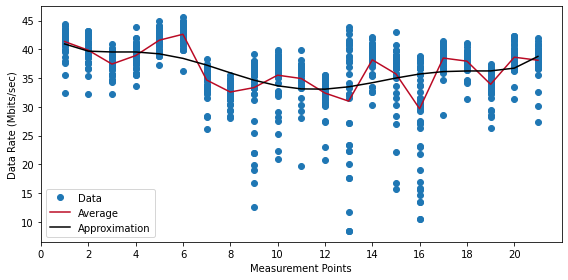

In [6]:
df1_mean = df1.groupby('Measurement').mean()
df1_point = df1_mean.index
df1_tm = df1_mean['Bitrate']

# Perform polynomial approximation for all measurements
degree = 6  
x_values = np.arange(1, 22)  # Define x-axis values as [0, 1, 2, ..., 21]
coeffs = np.polyfit(df1['Measurement'], df1['Bitrate'], degree)
approximation = np.polyval(coeffs, x_values)

# Plot the approximation
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df1['Measurement'], df1['Bitrate'], 'o', label='Data', color=colors[0])

ax.plot(df1_point, df1_tm, '-', label='Average', color=colors[1])

ax.plot(x_values, approximation, '-', label='Approximation', color=colors[2])
ax.set_xticks(range(0, 22, 2))

# Set labels and show the plot
ax.set_xlabel('Measurement Points')
ax.set_ylabel('Data Rate (Mbits/sec)')
ax.legend()

fig.tight_layout()
fig.savefig(r'Graphics/Construction-Site/cs-datarate.pdf', format='pdf')

plt.show()


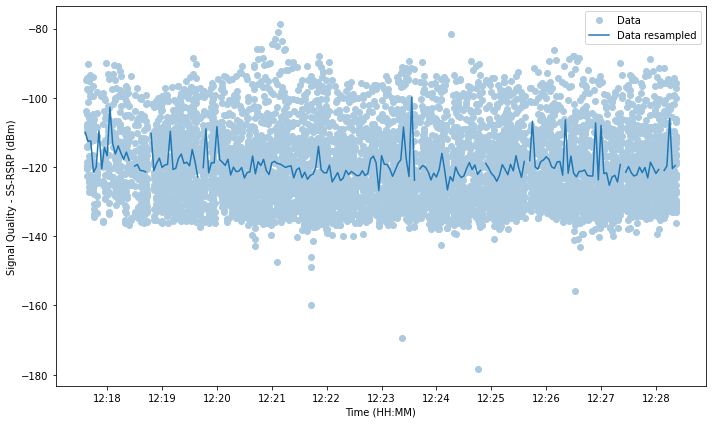

In [23]:
df = pd.read_csv(os.path.join(data_dir, "cs-rsrp.csv"), delimiter=';')

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = df['Time'].dt.time

# Set the 'Time' column as the index
df.set_index('Time', inplace=True)

# Convert time values to datetime format
df.index = pd.to_datetime(df.index, format='%H:%M:%S')

# Resample the data to reduce the number of points
df_resampled = df.resample('3S').mean()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['SS-RSRP'], 'o', label='Data', color='#abcae0')

# Plot the resampled data
plt.plot(df_resampled.index, df_resampled['SS-RSRP'], linestyle='-', label='Data resampled', color=colors[0])

# Format x-axis as time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

plt.xlabel('Time (HH:MM)')
plt.ylabel('Signal Quality - SS-RSRP (dBm)')
plt.legend()

plt.tight_layout()
plt.savefig(r'Graphics/Construction-Site/cs-ssrsrp.pdf', format='pdf')

plt.show()


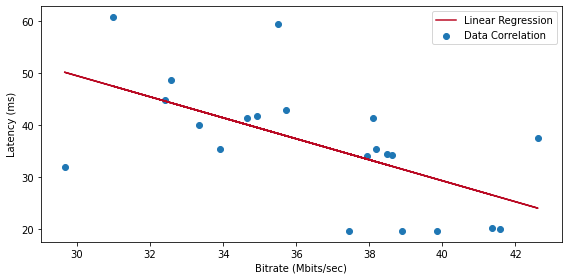

In [7]:
# Perform linear regression (first-degree polynomial)

coeffs = np.polyfit(df1_mean['Bitrate'], df2_mean['Value'], 1)
linear_regression = np.polyval(coeffs, df1_mean['Bitrate'])

# Plot the correlation with linear regression line

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(df1_mean['Bitrate'], df2_mean['Value'], color=colors[0], label='Data Correlation')
ax.plot(df1_mean['Bitrate'], linear_regression, color=colors[1], label='Linear Regression')
ax.set_xlabel('Bitrate (Mbits/sec)')
ax.set_ylabel('Latency (ms)')
#ax.set_title('Correlation between Bitrate and Latency')
ax.legend()

plt.tight_layout()
plt.savefig(r'Graphics/Construction-Site/cs-latency-bitrate-correlation.pdf', format='pdf')

plt.show()


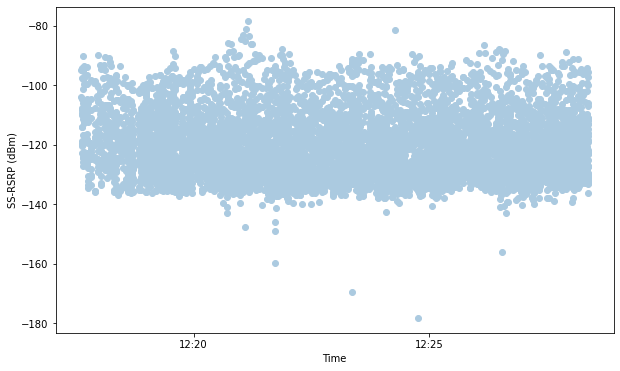

In [9]:
df = pd.read_csv(os.path.join(data_dir, "cs-rsrp.csv"), delimiter=';')

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = df['Time'].dt.time

# Convert time values to numeric format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').apply(mdates.date2num)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['SS-RSRP'], 'o', label='Data', color='#abcae0')

# Format x-axis as time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Time')
plt.ylabel('SS-RSRP (dBm)')
#plt.grid(True)
#plt.xticks(rotation=45)
plt.show()


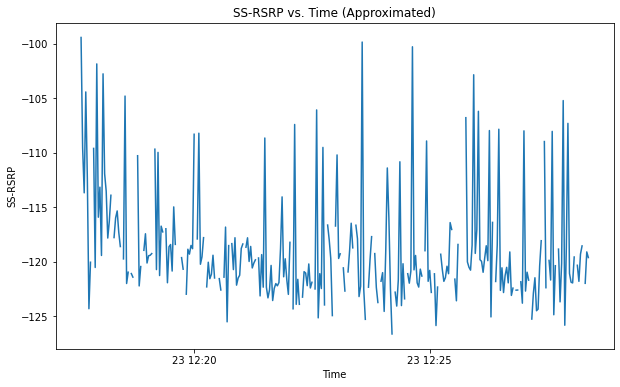

In [14]:
df = pd.read_csv(os.path.join(data_dir, "cs-rsrp.csv"), delimiter=';')

# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Set the 'Time' column as the index
df.set_index('Time', inplace=True)

# Resample the data to reduce the number of points
df_resampled = df.resample('2S').mean()

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the resampled data
ax.plot(df_resampled.index, df_resampled['SS-RSRP'], linestyle='-', markersize=3)

# Format the x-axis labels for better readability
#ax.xaxis.set_tick_params(rotation=45)

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('SS-RSRP')
ax.set_title('SS-RSRP vs. Time (Approximated)')

# Display the plot
plt.show()
